<h2>Анализ ключевых маркетинговых метрик приложения</h2>
<br><b>Краткое описание:</b>Развлекательное приложение Procrastinate Pro+ не приносит прибыли - затраты на его продвижение превышают приносимую приложением прибль. Была собрана информация по статистике посещений и покупок, а также рекламные расходы для установления причины.
<br><b>Цель:</b>проанализировать ключевые маркетинговые метрики приложения, понять, из-за чего расходы на продвижение приложения не окупаются и определить стратегию его дальнейшего продвижения как в целом, так и в разрезе по странам, устройствам и каналам привлечения. Дать рекомендации отделу маркетинга по корректироваке стратегии продвижения..
<br><b>Исходные данные:</b>Для развлекательного приложения Procrastinate Pro+ предоставлены данные о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов.
<br><b>План анализа следующий:</b>
<br>1. Обработка и анализ данных
<br>2. Сбор профилей пользователя
<br>3. Анализ платящих пользователей в разрезе по странам, устройствам и каналам привлечения
<br>4. Расчёт удержания и возврата
<br>5. Расчёт и анализ LTV и ROI
<br>6. Сводный анализ показателей после комплексного рассмотрения


# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

Загрузим все необходимые для исследования библиотеки и файлы. Выведем на экран описания датасетов для предления их струкутры и тиов данных

In [1]:
#библиотеки
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

#датасеты
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
costs=pd.read_csv('/datasets/costs_info_short.csv')
print(visits.info(),orders.info(),costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Переименуем столбцы в нижний регистр и преобразуем данные о времени в нужный формат

In [2]:
#датасет visits
visits = visits.rename(
columns={
'User Id': 'user_id',
'Region': 'region',
'Device': 'device',
'Channel': 'channel',
'Session Start': 'session_start',
'Session End': 'session_end',
}
)

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits['dt']=visits['session_start'].dt.date
display(visits.head())

#датасет orders
orders = orders.rename(
columns={
'User Id': 'user_id',
'Event Dt': 'event_dt',
'Revenue': 'revenue',
}
)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
display(orders.head())

#датасет costs
costs = costs.rename(
columns={
'Channel': 'channel',
}
)
costs['week']=pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
display(costs.head())

,user_id,region,device,channel,session_start,session_end,dt
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01,2019-05-01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35,2019-05-01
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08,2019-05-01
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25,2019-05-01
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40,2019-05-01


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs,week
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18


<h3>Проверка явных и неявных дубликатов</h3>
Уберем явные дубликаты по каждому датафрейму

In [3]:
print(visits.duplicated().sum())
visits = visits.drop_duplicates().reset_index(drop=True)

print(orders.duplicated().sum())
orders = orders.drop_duplicates().reset_index(drop=True)

print(costs.duplicated().sum())
costs = costs.drop_duplicates().reset_index(drop=True)

0
0
0


Проверим на неявные дубликаты - определим уникаьные значения для регионов, устройств и каналов продвижения для исключения одних и тех же строк, но с разным написанием (прописными или строчными буквами).

In [4]:
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())
print(costs['channel'].unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


<b>Явные и неявные дубликаты отсутствуют.</b>

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Зададим функции, необходимые для дальнейшего анализа
<br><b>Функция расчёта LTV и ROI</b>

In [5]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<br><b>Функция расчёта удержания</b>

In [6]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

<b>Функция расчёта конверсии</b>

In [7]:
def get_conversion(
    profiles,
    purchases,  # заменили sessions
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Шаг 1. Получить пользовательские профили и данные о покупках
    # передаём их в качестве аргументов profiles и purchases

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Найти дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Шаг 3. Добавить данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Шаг 4. Рассчитать лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Шаг 6. Посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Шаг 7. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 8. Объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция Plot LTV ROI

In [8]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

Определим минимальную и максимальную даты привлечения пользователей. Также определим страны, откуда приходят пользователи, количество и доли платящих пользователей в этих странах

In [9]:
def get_profiles(sessions, orders,ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())#.agg({'user_id': 'nunique'}) # ваш код здесь

#дальше пытаемся вкрячить аквизишн

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
#это не добавляю
    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
#тут заканичваем колхозить аквизишн




    return profiles




In [10]:
# строим профили по двум наборам данных
profiles = get_profiles(visits, orders,costs)

print('Минимальная дата привлеения пользователей',profiles['dt'].min())
print('Максимальная дата привлеения пользователей',profiles['dt'].max())
print('Количество пользователей по странам')
print(pd.pivot_table(profiles,values='user_id',index='region',aggfunc='count').sort_values(by='user_id', ascending=False))

print('Доля платящих пользователей по странам')
print(
    profiles.groupby('region').agg({'payer':'mean'}).sort_values(by='payer', ascending=False)
    
)

Минимальная дата привлеения пользователей 2019-05-01
Максимальная дата привлеения пользователей 2019-10-27
Количество пользователей по странам
               user_id
region                
United States   100002
UK               17575
France           17450
Germany          14981
Доля платящих пользователей по странам
                  payer
region                 
United States  0.069019
Germany        0.041119
UK             0.039829
France         0.037994


В выборке представлены пользватели из следующих стран: США, Германия, Великобритания и Франция. Набольший процент платящих пользователей приходит из США (почти 7%), наименьший - из Франции (3,7%).
Сравним также абсолютное количество платящих пользователей

In [11]:
print(
    profiles.groupby('region').agg({'payer':'sum'}).sort_values(by='payer', ascending=False)
    
)

               payer
region              
United States   6902
UK               700
France           663
Germany          616


Аналогично, большинство платящих пользователей из США, наименьшее число платящих - из Франции

Сделаем аналогичный разрез по устройствам

In [12]:
print('Количество пользователей по устройствам')
print(pd.pivot_table(profiles,values='user_id',index='device',aggfunc='count').sort_values(by='user_id', ascending=False))
print('Доля платящих пользователей по устройствам')
print(
    profiles.groupby('device').agg({'payer':'mean'}).sort_values(by='payer', ascending=False)
    
)

Количество пользователей по устройствам
         user_id
device          
iPhone     54479
Android    35032
PC         30455
Mac        30042
Доля платящих пользователей по устройствам
            payer
device           
Mac      0.063644
iPhone   0.062079
Android  0.058518
PC       0.050468


Наиболее платящими являются пользователи продуктов Apple - Mac и iPhone, причем примерно одиаково - 6,3% и 6,2% соответственно. Наименее платящими оказались пользователи РС - только 5% платящих пользователей.

А также в разрезе по каналам привлечения

In [13]:
print('Количество пользователей по каналам привлечения')
print(pd.pivot_table(profiles,values='user_id',index='channel',aggfunc='count').sort_values(by='user_id', ascending=False))

print('Доля платящих пользователей по каналам привлечения')
print(
    profiles.groupby('channel').agg({'payer':'mean'}).sort_values(by='payer', ascending=False)
    
)

Количество пользователей по каналам привлечения
                    user_id
channel                    
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Доля платящих пользователей по каналам привлечения
                       payer
channel                     
FaceBoom            0.122049
AdNonSense          0.113402
lambdaMediaAds      0.104700
TipTop              0.096007
RocketSuperAds      0.079137
WahooNetBanner      0.052964
YRabbit             0.038265
MediaTornado        0.035747
LeapBob             0.030633
OppleCreativeMedia  0.027077
organic             0.020553


наиболее платящие пользователи - привлеченные через FaceBoom, наименее - органически привлеченные. Среди платынх источников привлечения меньше всего доля платящих у OppleCreativeMedia

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Рассчитаем суммарный объем потраченных рекламных бюджетов:

In [14]:
print('Суммарный рекламный бюджет',"%.1f" % costs['costs'].sum())

Суммарный рекламный бюджет 105497.3


Оценим траты отдельно на каждый из источников привлечения

,costs,cost_share
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


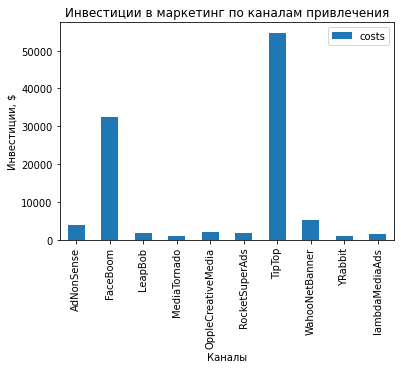

In [15]:
pivot_source=pd.pivot_table(costs,values='costs', index='channel',aggfunc='sum')
pivot_source['cost_share']=pivot_source['costs']/pivot_source['costs'].sum()

display(pivot_source.sort_values(by='costs',ascending=False))

pd.pivot_table(costs,values='costs', index='channel',aggfunc='sum').plot(kind='bar')
plt.title('Инвестиции в маркетинг по каналам привлечения')
plt.ylabel('Инвестиции, $')
plt.xlabel('Каналы')
plt.show()

По бюджету на рекламу с сильным отрвом лидируют TipTop и FaceBoom (52 и 31% всего рекламного бюджета, соотвественно). При этом бюджет TipTop в 1.7 раз больше, чем у FaceBoom, но доля платящих пользователей, привлеченных через FaceBoom занчительно выше, чем для TipTop.
Это уже первый признак, который дает повод усомниться в эффективности TipTop как канала привлечения.
<br>Оценим привлечение по времени. Рассматриваемый датасет содержит данные для промежутка времени с 2019-05-01 по 2019-10-27. Достаточную дискретность обеспечит рассмотрение по неделям.

,costs
week,
18,1455.640
19,2031.820
20,1976.320
21,2297.120
22,3427.075
23,2915.740
24,2706.390
25,3421.390
26,4837.120


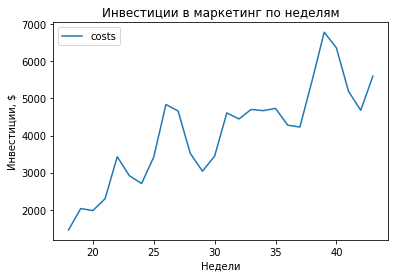

In [16]:
display(pd.pivot_table(costs,values='costs', index='week',aggfunc='sum'))
pd.pivot_table(costs,values='costs', index='week',aggfunc='sum').plot()
plt.title('Инвестиции в маркетинг по неделям')
plt.ylabel('Инвестиции, $')
plt.xlabel('Недели')
plt.show()

По неделя просматривается стабильный рост маркетингового бюджета с явным выделением двух крупных рекламных компаний в районе 25 и 39 недели.


Определим, сколько в среднем стоило привлечение одного покупателя из каждого источника.
Для этого совместим таблицы с количеством привлеченных покупателей и маркетинговыми инвестициями в каждый источник и определим средний показатель


In [17]:
#сформируем таблицу с покупателями по каналу привлечения
buyers=profiles.groupby('channel').agg({'payer':'sum'})
#сформируем таблицу с бюджетами
budgets=pd.pivot_table(costs,values='costs', index='channel',aggfunc='sum')
#объединим таблицу по признаку channel
budget_2_buyer=pd.merge(budgets,buyers,how='inner',on='channel')
budget_2_buyer['per_buyer']=budget_2_buyer['costs']/budget_2_buyer['payer']
display(budget_2_buyer.sort_values(by='per_buyer',ascending=False))

#найдем средний бюджет на Покупателя
print('Средний бюджет на привлечение 1 покуателя, долл.',"%.1f" % (profiles.query('channel != "organic"')['acquisition_cost'].mean()))

,costs,payer,per_buyer
channel,,,
TipTop,54751.30,1878,29.154047
WahooNetBanner,5151.00,453,11.370861
OppleCreativeMedia,2151.25,233,9.232833
FaceBoom,32445.60,3557,9.121619
AdNonSense,3911.25,440,8.889205
lambdaMediaAds,1557.60,225,6.922667
LeapBob,1797.60,262,6.861069
MediaTornado,954.48,156,6.118462
YRabbit,944.22,165,5.722545


Средний бюджет на привлечение 1 покуателя, долл. 1.1


Дополним таблицей с расчётом средней стоимости привлечения 1 пользователя по каждому каналу

In [18]:
display(pd.pivot_table(profiles.query('channel != "organic"'),values='acquisition_cost', index='channel', aggfunc='mean' ).sort_values(by='acquisition_cost',ascending=False))

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Наибольшие затраты на одного платящего пользователя приходятся на канал продаж через TipTop, при этом, доля и абсолютное число платящих полтзователей, приходящих с TipTop несоразмерно низкое. FaceBoom который является лидером по привлечению пользователей имеет в 3 раза меньший удельный бюджет на рекламу, при этом привлекая больше платящих пользователей.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы
Рассчитаем и построим общие графики изменения LTV и ROI для рассматриваемых датасетов

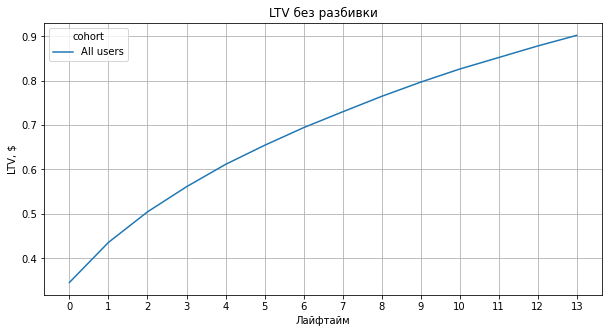

In [19]:
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=[]
)



report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV без разбивки')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

Общий LTV на рассматриваемом горизонте растёт, и достигает показателя порядка 0.9 долларов на пользователя. Сопоставим данный LTV с затратами на продвижение посредством расчёта общего ROI

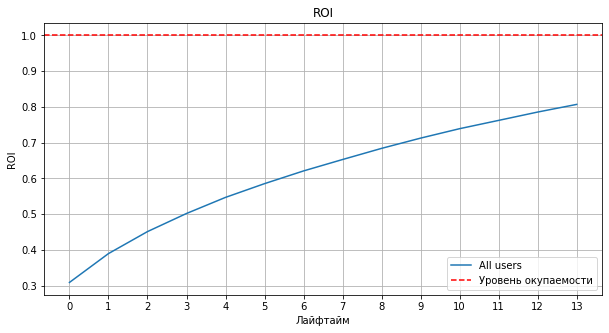

In [20]:
report = roi.drop(columns=['cac','cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Построим графики для основных бизнес-метрик в совокупности. Окно сглаживания возьмем 20 дней.

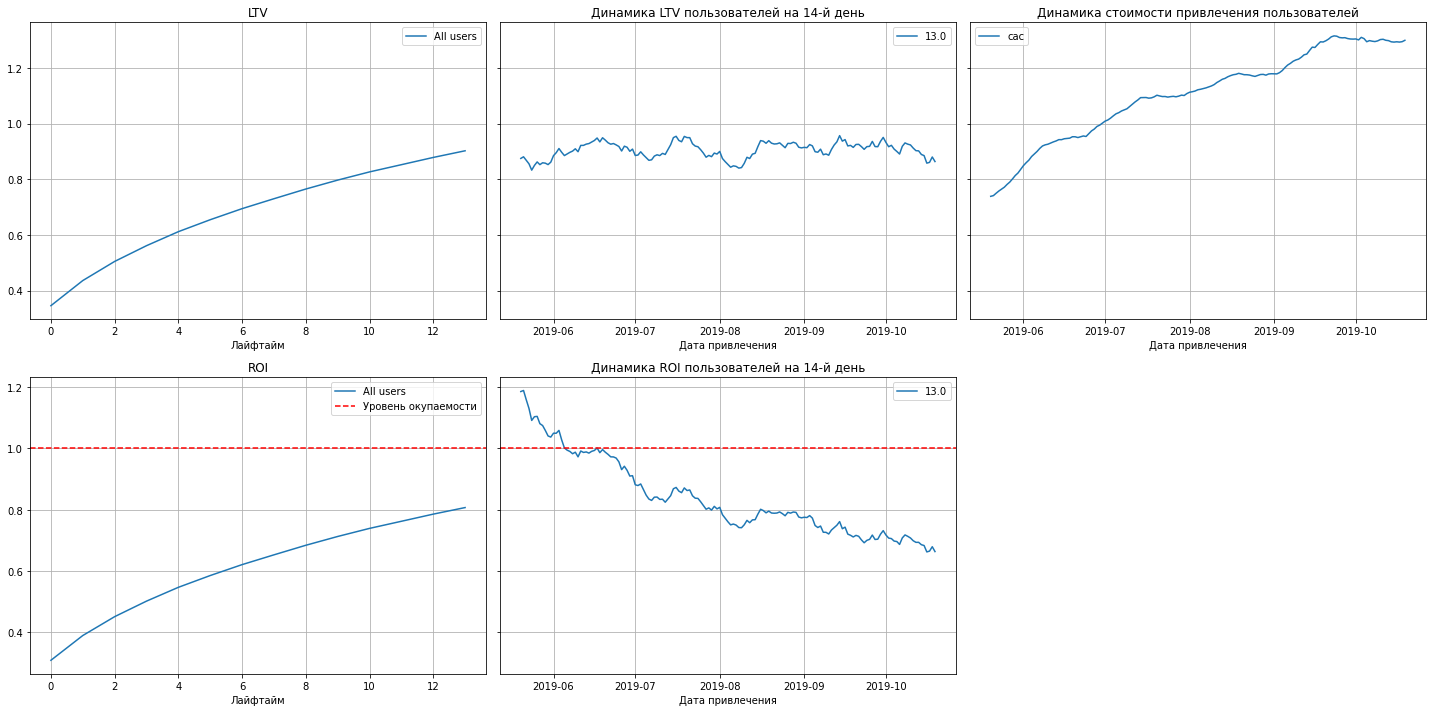

In [21]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20) 

Общий ROI на заданном горизонте также растет, но едва достигает показателя 0.8, то есть сделанные <b>инвестиции в првлечение пользователей не окупаются.</b> При том, что в динамике ужержание клиентов находится примерно на неизменном уровне, то есть клиенты не уходят. Что говорит о том, что сделанные маркетинговые инвестиции эффективны и приложение в целом работает хорошо - user experience положительный.
<br>Первый косвенный признак того, что с инвестициям не все хорошо, мы получили выше - <b>инвестиции в продвижение через TipTop крантно выше, чем в любых других каналах, но при этом доля платящих пользователей TipTop ниже.</b>
<br>Изучим LTV и ROI в разрезе по каналам, странам и устройствам, чтоб более детально определить причину неокупаемости инвестиций.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

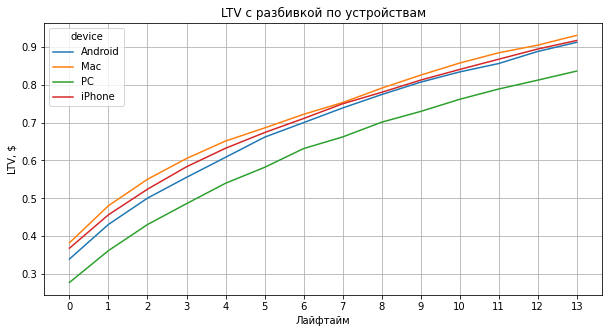

In [22]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)



report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по устройствам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

Максимальный LTV имеют пользователи продуктов Apple, пользователи Андроид - несильно отстают. Миниальный LTV - пользователи PC. 
Это коррелирует с долями платящих пользователей, найденными выше

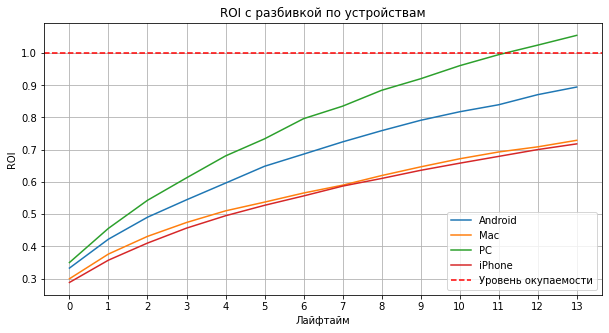

In [23]:
report = roi.drop(columns=['cac','cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по устройствам')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Оценим динамику инвестиций на привелчение пользователя по устройствам:

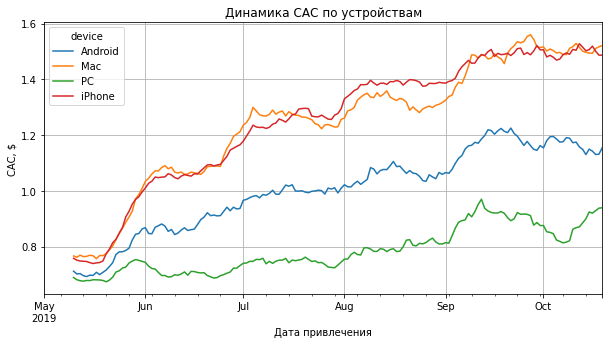

In [24]:
roi_history.pivot_table(
    index='dt', columns='device', values='cac', aggfunc='mean'
).rolling(10).mean().plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по устройствам')
plt.show()

А также динамику изменения ROI, сглаженную помесячно

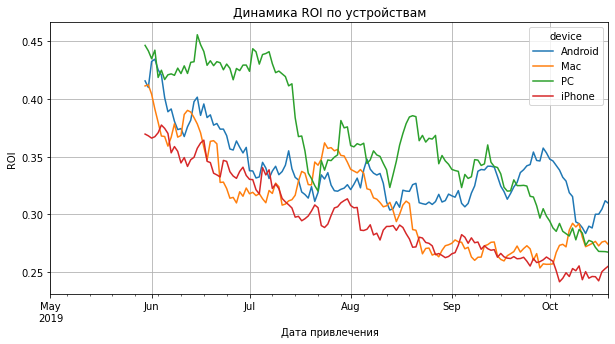

In [25]:
roi_history.pivot_table(
    index='dt', columns='device', values=0, aggfunc='mean').rolling(30).mean().plot(grid=True, figsize=(10, 5))
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.title('Динамика ROI по устройствам')
plt.show()

Динамика САС и ROI говорит о растущем объеме продвижения по всем устройствам, при этом инвестиции в продукцию Apple превалируют над аналогичными для Андроида и ПК. Сростом инвстиций в рекламу пропорционально снижается и ROI

Изучим также среднюю конверсию пользователей:

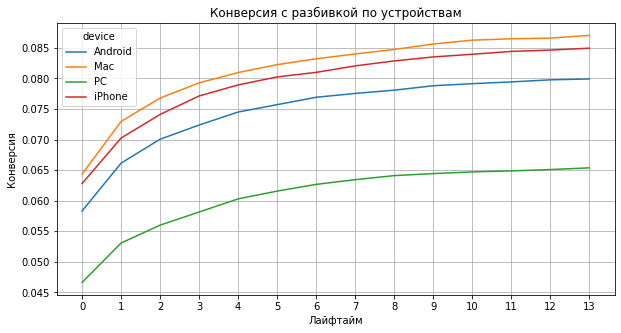

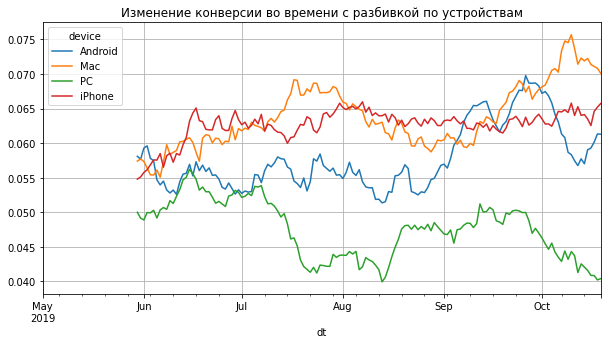

In [26]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

#строим график конверсии
report = result_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия с разбивкой по устройствам')
plt.ylabel('Конверсия')
plt.xlabel('Лайфтайм')
plt.show()
#строим график конверсии во времени
result_in_time.pivot_table(
    index='dt', columns='device', values=0, aggfunc='mean').rolling(30).mean().plot(grid=True, figsize=(10, 5))
plt.title('Изменение конверсии во времени с разбивкой по устройствам')
plt.show()

Конверсия находится на постоянном уровне и лишь чуть снижается для ПК. Таким образом, можно говорить, что в разрезе устройств эффективность маркетинга вышла на плато.

Проанализируем удержание

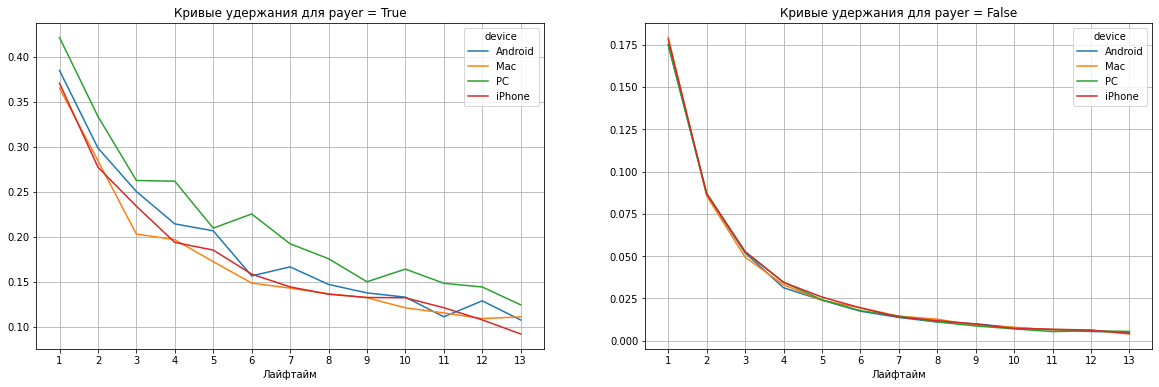

In [27]:
results_raw, result_grouped = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = result_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Удержание по всем устройствам для платящих пользователей примено одинаковое.

Построим графики для основных бизнес-метрик в совокупности. Окно сглаживания возьмем 20 дней.

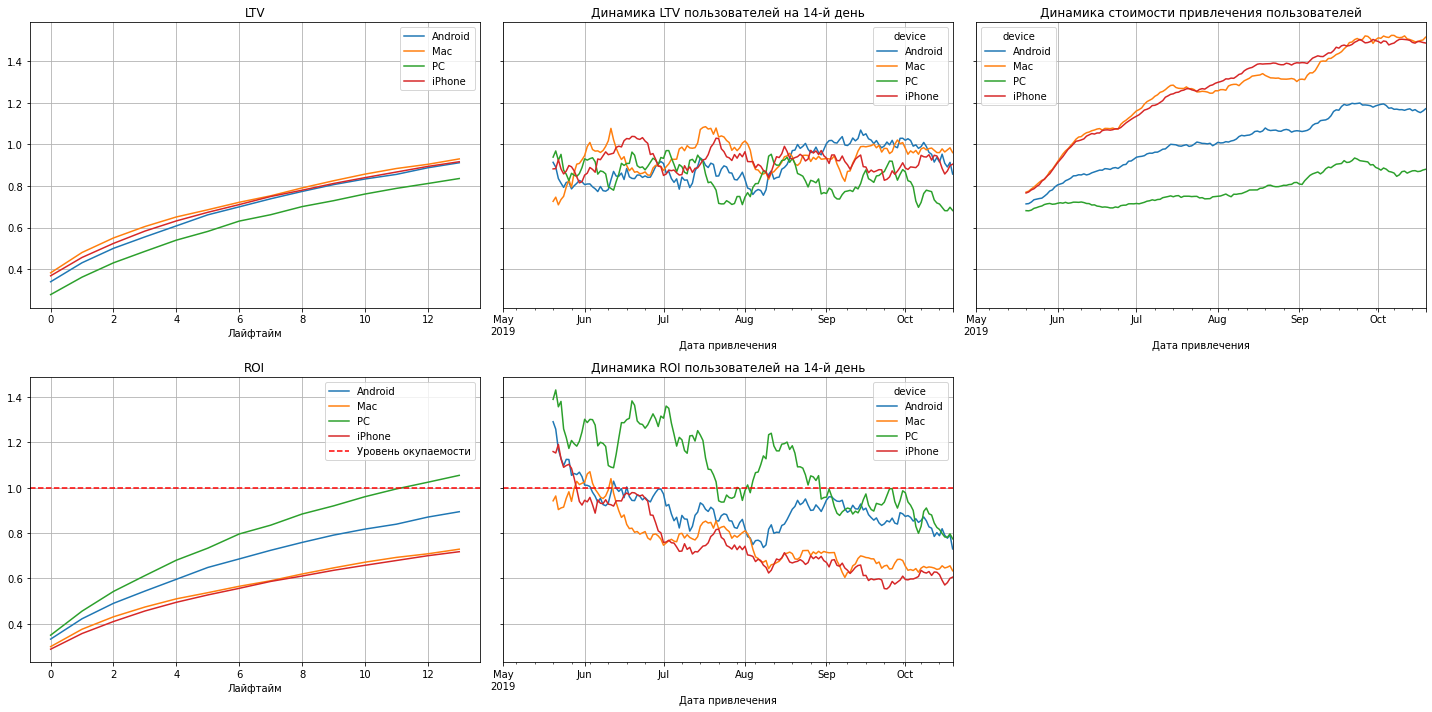

In [28]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20) 

Окупаемости достигают пользователи с устройствами, имеющими минимальные LTV - это PC. Из устройств с бОльшим LTV ближе всех к окупаемости приблжается Android. Устройства Apple, польззователи которых демонстрируют максимальные LTV не окупают рекламы. Вероятно, это происходит из-за того, что маркетинговые бюджеты по этим устройствам завышены, а LTV уже достигло потолка. Данное наблюдение показывает, что в разрезе устройств продвижение достигло некоего плато, дальнейшее увеличение инвестиций с фокусом на отдельные устройства лишь приведет к ухудшению финансовых и маркетинговых метрик. 
<br>В таком случае, <b>можно говорить о снижении рекламного бюджета, тк пул постоянных пользователей устройств Apple уже сформирован.</b>

### Проанализируйте окупаемость рекламы с разбивкой по странам

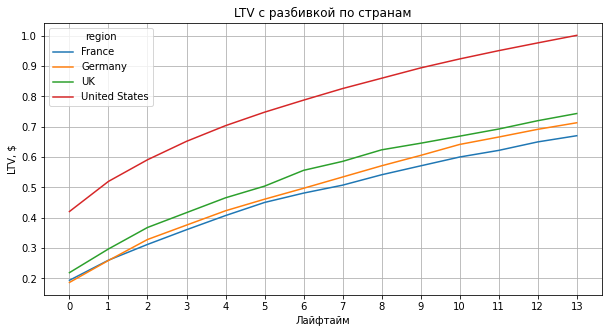

In [29]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по странам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

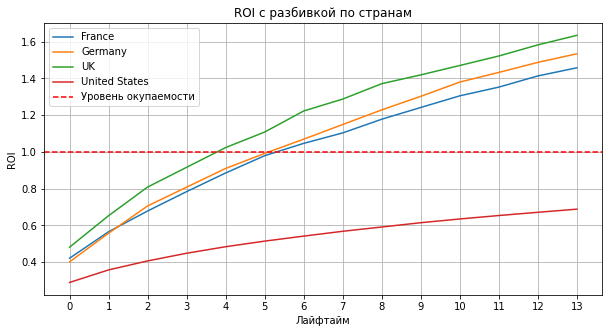

In [30]:
report = roi.drop(columns=['cac','cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по странам')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Оценим динамику инвестиций на привелчение пользователя по странам:

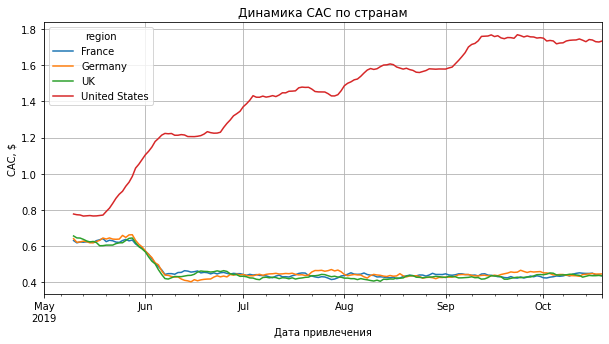

In [31]:
roi_history.pivot_table(
    index='dt', columns='region', values='cac', aggfunc='mean'
).rolling(10).mean().plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по странам')
plt.show()

На графике видно, что рекламные бюджеты для США значительно превышают остальные и сильно растут, тогда как бюджеты на другие регионы значительно ниже и примерно постоянны.

А также динамику изменения ROI, сглаженную помесячно

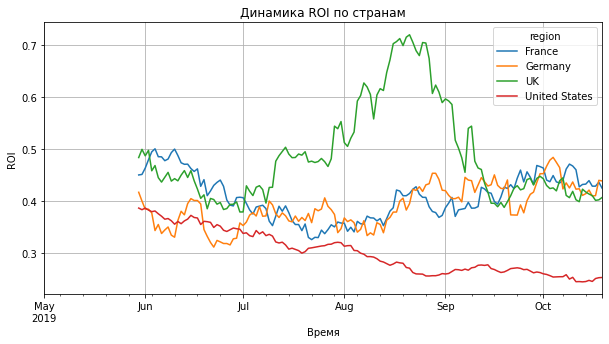

In [32]:
roi_history.pivot_table(
    index='dt', columns='region', values=0, aggfunc='mean').rolling(30).mean().plot(grid=True, figsize=(10, 5))
plt.ylabel('ROI')
plt.xlabel('Время')
plt.title('Динамика ROI по странам')
plt.show()

ROI для США также демонстрирует снижение, но не такое крутое, как рост затрат на маркетинг, значит привлечение все таки даёт свои плоды. Исследуем конверсию с разбивкой по странам

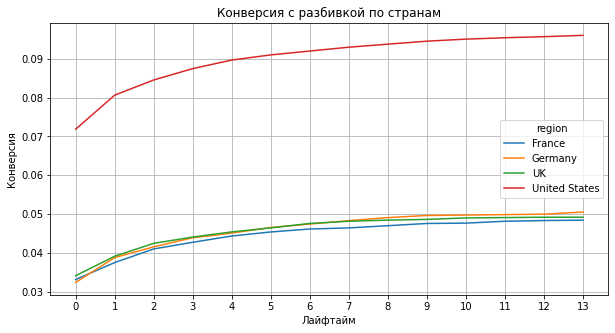

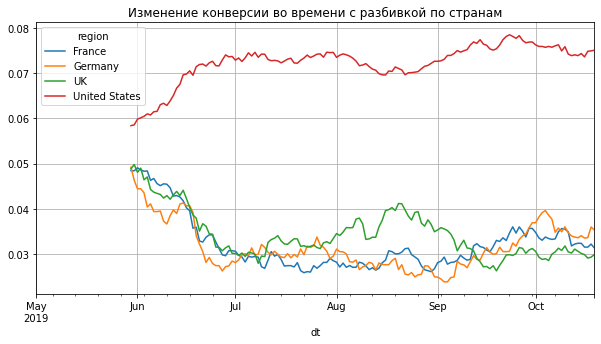

In [33]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

#строим график конверсии
report = result_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия с разбивкой по странам')
plt.ylabel('Конверсия')
plt.xlabel('Лайфтайм')
plt.show()
#строим график конверсии во времени
result_in_time.pivot_table(
    index='dt', columns='region', values=0, aggfunc='mean').rolling(30).mean().plot(grid=True, figsize=(10, 5))
plt.title('Изменение конверсии во времени с разбивкой по странам')
plt.show()

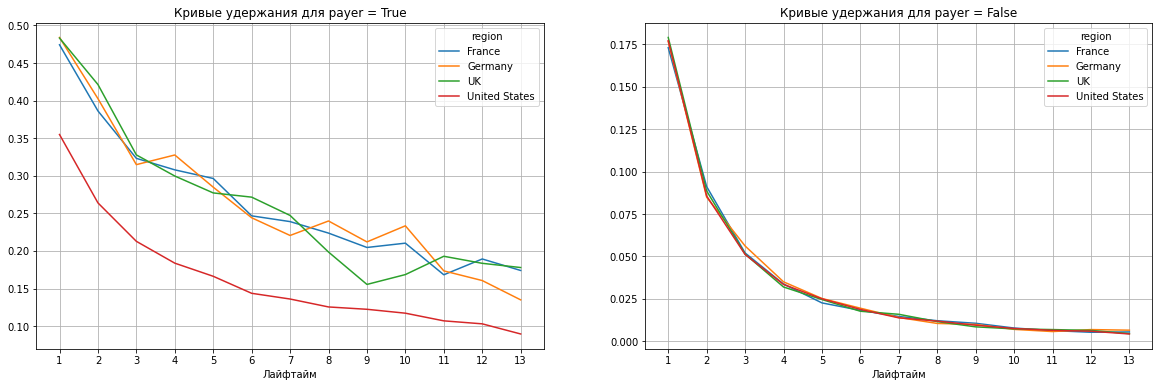

In [34]:
results_raw, result_grouped = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = result_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Построим графики для основных бизнес-метрик в совокупности. Окно сглаживания возьмем 20 дней.

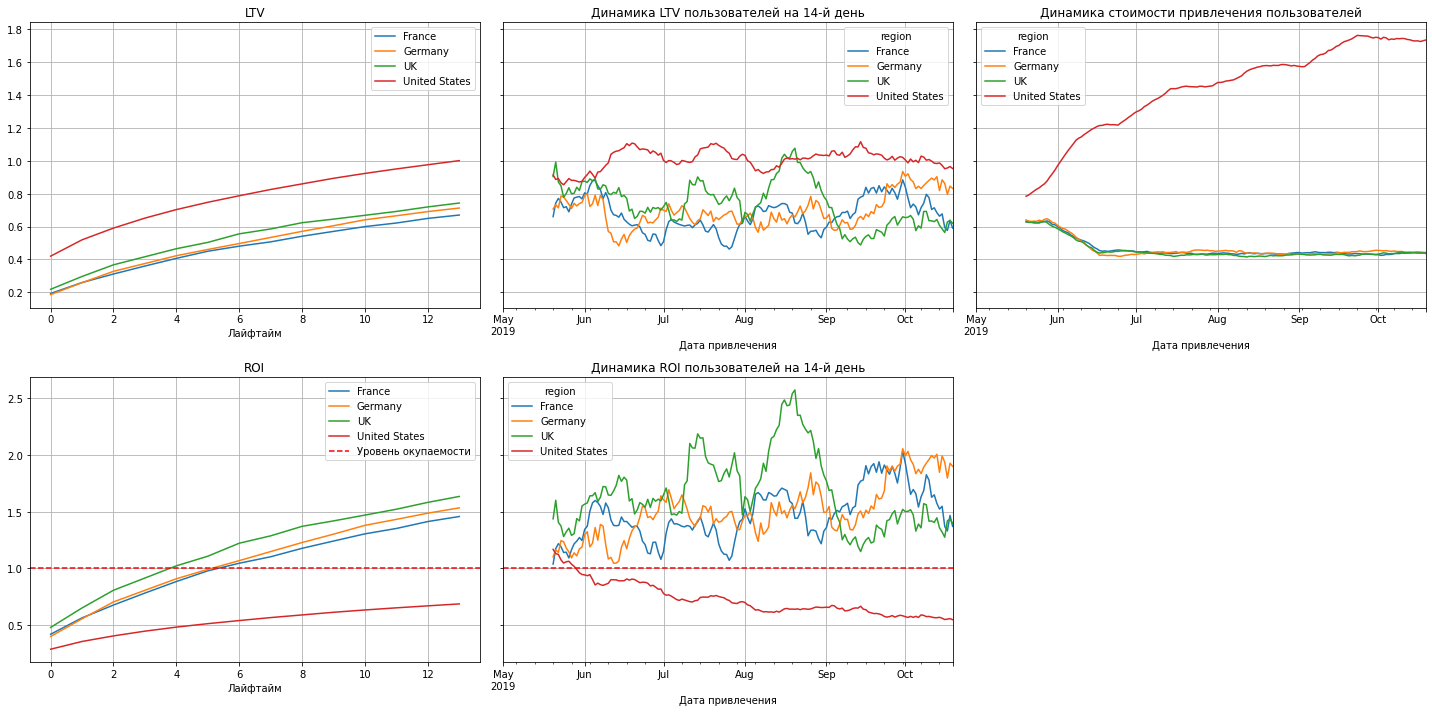

In [35]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20) 

Конверсия в США выше других регионов, однако несмотря на рост рекламных бюжетов она не растёт. Удержание в США также ниже, чем в остальных регионах.
<br>Регион хоть и имеет высокий LTV, но не смотря на высокую "стоимость" пользователя, затраты на рекламу слишком высоки - конверсия вышла на плато, а показатель ROI убывает, несмотря на  рост рекламных бюджетов. Такая картина говорит о том, что <b>рынок уже  "разогрет" и дальнейший рост рекламных бюджетов с фокусом на США не имеет сымсла.</b>
При этом, за счёт снижения и удеражния на псостоя нном уровне рекламных бюджетов для трех других регионов, окупаемость в них достигается. Особенно интересно смотрится Великобритнаия, можно рассмотреть интенсификацию продвижения в этой стране.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

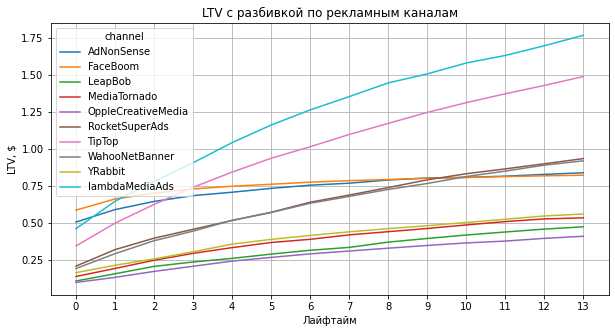

In [36]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)



report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по рекламным каналам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

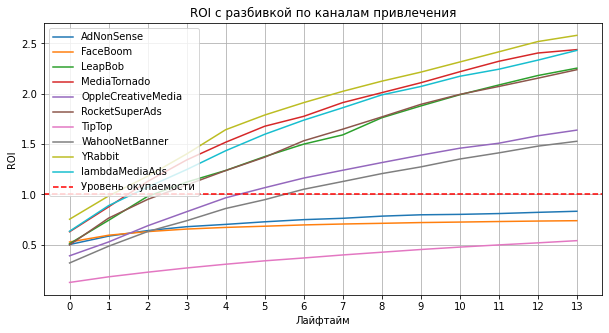

In [37]:
report = roi.drop(columns=['cac','cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

Оценим динамику инвестиций на привелчение пользователя по каналам продвижения:

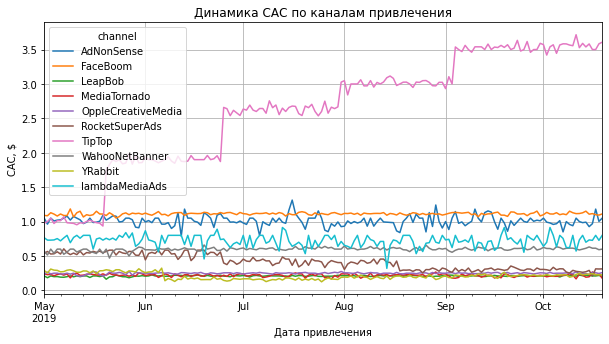

In [38]:
roi_history.pivot_table(
    index='dt', columns='channel', values='cac', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Динамика маркетинговых инвестиций в канал TipTop демонстрирует значительный рост в среднем каждый месяц и сильно превышает инвестиции в остальные каналы продажи. Причем для остальных каналов объем инвестиций сохраняется неизменным. Это говорит об активном продвижении продаж через TipTop.
<br>Также оценим динамику изменения ROI, сглаженную помесячно

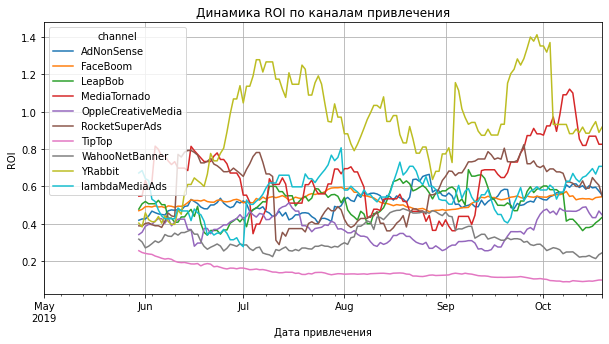

In [39]:
roi_history.pivot_table(
    index='dt', columns='channel', values=0, aggfunc='mean').rolling(30).mean().plot(grid=True, figsize=(10, 5))
plt.ylabel('ROI')
plt.xlabel('Дата привлечения')
plt.title('Динамика ROI по каналам привлечения')
plt.show()

ROI каналов находятся примерно на постоянном уровне, при этом для части неосновных каналов продвижения ROI периодически демонстрирует резки рост или спад, в реднем оставаяс на уровне.
<br>Из каналов с большим объемом инвестиций FaceBoom демонстрирует стабильный ROI, который находится сильно ниже границы окупаемости и для канала с довольно большими инвестициями это плохой показатель.
<br>ROI канала TipTop демонстрирует снижение, но еси принимать во внимание галопирующих рост рекламных бюджетов такое умеренное снижение ROI говорит о пречспективе  развития родаж через этот канал.

Исследуем конверсию

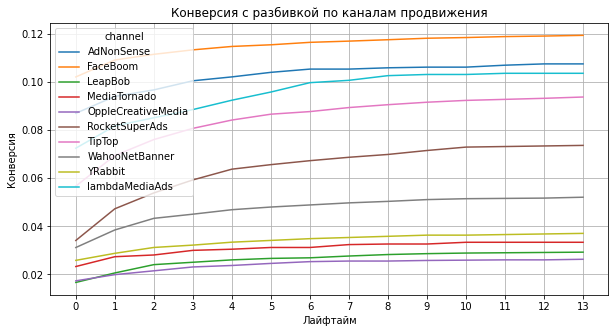

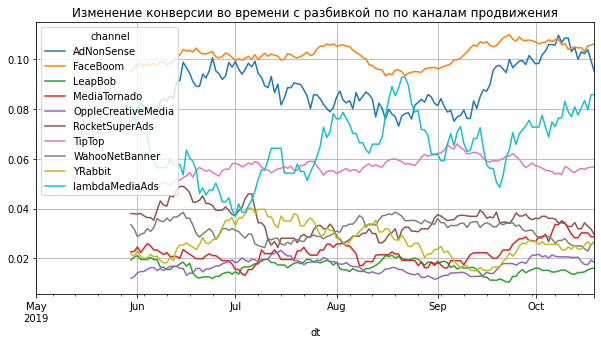

In [40]:
result_raw, result_grouped, result_in_time = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

#строим график конверсии
report = result_grouped.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('Конверсия с разбивкой по каналам продвижения')
plt.ylabel('Конверсия')
plt.xlabel('Лайфтайм')
plt.show()
#строим график конверсии во времени
result_in_time.pivot_table(
    index='dt', columns='channel', values=0, aggfunc='mean').rolling(30).mean().plot(grid=True, figsize=(10, 5))
plt.title('Изменение конверсии во времени с разбивкой по по каналам продвижения')
plt.show()

Проанализируем удержание

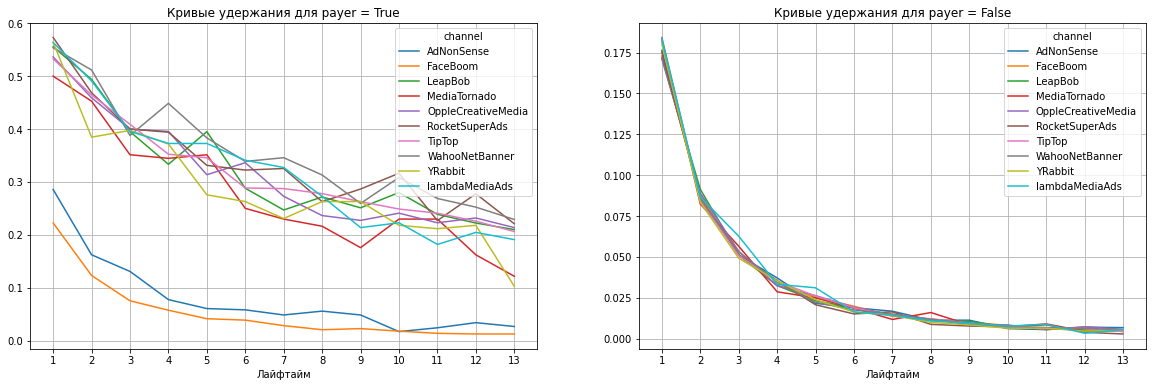

In [41]:
results_raw, result_grouped = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plt.figure(figsize=(20, 6))  # задаём размер сетки

# исключаем размеры когорт и удержание первого дня
report = result_grouped.drop(columns=['cohort_size', 0])

for i, payer in enumerate(profiles['payer'].unique()):
    report.query('payer == @payer').droplevel('payer').T.plot(
        grid=True,  # добавляем сетку
        # отметки на оси X — названия колонок
        xticks=list(report.columns.values),
        ax=plt.subplot(1, 2, i + 1), # задаём расположение графиков
    )
    plt.xlabel('Лайфтайм')
    plt.title('Кривые удержания для payer = {}'.format(payer))

plt.show()

Построим графики для основных бизнес-метрик в совокупности. Окно сглаживания возьмем 20 дней.

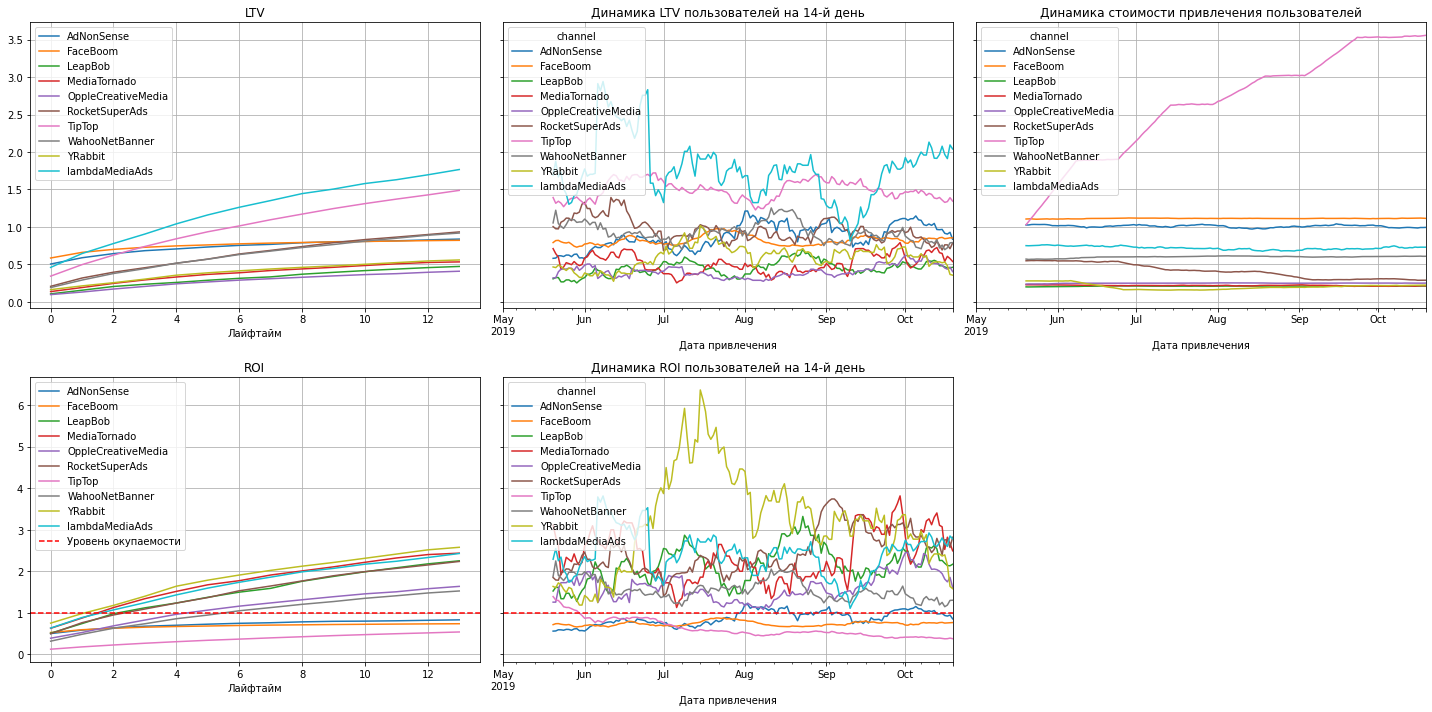

In [42]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=20) 

По каналам привлечения в явных аутсайдерах с точки зрения ROI: TipTop, FaceBoom и AdNonSense. 
<br>При этом TipTop имеет значительно больший рекламный бюджет, который стабильно растёт.  Не смотря на высокий LTV, он не растёт, как не растет и конверсия по этому каналу. ROI также стабильно низкий.
    Таким образом, становится очевидно, что продажи по данному каналу неэффективны.
    <br> Что касается  FaceBoom и AdNonSense - они вышли на плато ROI и LTV.  ROI FaceBoom также демонстрирует низкие показатели и не растёт. <u>Удержание платящих пользователей по обоим каналам тоже очень низкое.</u> Дальнейший рост продаж через эти каналы сомнителен. 
    Возможно, маркетинговые бюджеты по ним можно сократить. 
    <br>Также целесообразно рассмотреть перевод части рекламы на каналы продаж YRabbit, MediaTornado и lambdaMediaAds - они демонстрируют одновременно хорошие LTV и ROI, при достаточно скромной стоимости привлечения покупателя (около $0.22, $0.22 и $0.7 соответсвенно) и неплохом показатели конверсии.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

<br><b>Анализ причин неэффективности</b>
<br>Неэффективность по определенным каналам продаж происходит из-за того, что в уже "разогретые" каналы, имеющие стабильный спрос продолжают инвестироваться значительные маркетинговые бюджеты. Например, продажи пользвателям Apple или продажи в США. В обоих этих случае пул платящих клиентов уже сформировани и скорее всего достиг некоего насыщения. Дальнейшие маркетинговые инввестиции могут быть снижены до "поддерживающего" уровня, таким образом удастся выйти на окупаемость продвижения.
<br>Потенциал роста демонстрируют продажи в Германии и Великобритании - последняя демонстирует сезонный всплеск ROI и имеет достаточно высокий этот показатель.

<br>Канал TipTop имеет огромный рекламный бюджет, который стабильно растёт.  Не смотря на высокий LTV, этот показатель не растёт, как не растет и конверсия по этому каналу. ROI также стабильно низкий. Таким образом, становится очевидно, что продажи по данному каналу неэффективны.
    <br> Каналы FaceBoom и AdNonSense вышли на плато ROI и LTV.  ROI FaceBoom также демонстрирует низкие показатели и не растёт. Удержание платящих пользователей по обоим каналам тоже очень низкое.Дальнейший рост продаж через эти каналы сомнителен. 
    <br><b>Маркетинговые бюджеты по каналам TipTop, FaceBoom и AdNonSense следует сократить.</b>

<br><b>Рекомендации для отдела маркетинга</b>
1. Снизить маректинговые бюджеты для США и пользователей Apple (Mac, IPhone) до поддерживающего уровня
2. Обратить дополнительное внимание на возможности продвижения в Великобритании и Германии.
3. Снизить маректинговые бюджеты для каналов продаж TipTop, FaceBoom и AdNonSense - каналы слабо удерживают пользователей, слабо конвертируются, при этома затратны и не окупаются.
3. Рассмотреть возможность увеличения продаж через каналы YRabbit, MediaTornado и lambdaMediaAds - они демонстрируют одновременно хорошие LTV и ROI, при достаточно скромной стоимости привлечения покупателя (около  0.22, 0.22 и $0.7 соответсвенно) и неплохом показатели конверсии.